**Solve problems below, and download .ipynb file with “File>Download .ipynb” menu.**



*   The name of the ipynb file should be: Programming01_StudentID_Name.ipynb<br/>
ex) Programming01_20225432_YeongjinKo.ipynb
*   Submission Deadline : 2024/03/22 11:59pm (23:59)



BlackBoard submission should be completed before the deadline. <br/>
If it's late less than 24 hours, you will get 50% of your score. If it's late more than 1 day, you will get 0% of your score.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Problem 1 (Monty Hall Problem)


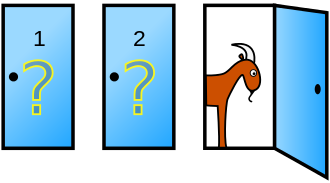



Suppose you're on a game show, and you can choose one door among three doors. Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door which has a goat, say No. 3. He then asks to you, "Do you want to change your choice to door No. 2?" Would you change your choice or not? Between changing and not changing your choice, what would give you a higher chance of getting the car?

We will solve this problem through Python code. (Simulation of Monty Hall Problem)

**Implement the algorithm below** <br/><br/>
0) make the list of doors  [0,1,2]. Also, execute the following codes:

**change_count=0; change_correct_count=0; change_incorrect_count=0; unchange_count=0; unchange_correct_count=0; unchange_incorrect_count=0** <br/>
1) select one door randomly from [0,1,2]. Assign this value to variable **answer_door**. (This is the door behind which the car is hidden.)<br/>
2) select one door randomly from [0,1,2]. Assign this value to variable **first_decision_door**. (This is your first choice of door.)<br/>
3) Among the remaining two doors after excluding the **first_decision_door**, find the door behind which there is a goat and assign its value to variable **not_answer_door**. (If **first_decision_door=answer_door**, choose **not_answer_door** randomly among the remaining two doors.) This is the door that the host shows to you that a goat is behind it.<br/>
4) Certainly your final choice will not be  **not_answer_door**. Among the other two doors, select **second_decision_door** randomly <br/>
5-1) if **first_decision_door** is not equal to **second_decision_door**,<br/>
execute **change_count += 1**.<br/>
5-1-1) in case 5-1), if **answer_door** is equal to **second_decision_door**,<br/>
execute **change_correct_count += 1**, else, execute **change_incorrect_count += 1**<br/>
5-2) otherwise, if, **first_decision_door** is equal to **second_decision_door**,<br/>
execute **unchange_count += 1**.<br/>
5-2-1) in case 5-2), if **answer_door** is equal to **second_decision_door**,<br/>
execute **unchange_correct_count += 1**, else, execute **unchange_incorrect_count += 1**<br/>
6) repeat 1) ~ 5) 100000 times<br/>
7) print<br/>
- **change_count, change_correct_count, change_incorrect_count**<br/>
- **unchange_count, unchange_correct_count, unchange_incorrect_count**<br/>
- Ratio(**change_correct_count / change_count**)<br/>
- Ratio(**unchange_correct_count / unchange_count**)<br/>


In [2]:
import numpy as np
import random

## DO NOT MODIFY!!!! #
random.seed(42)      #
np.random.seed(42)   #
######################

In [8]:
change_count = 0
change_correct_count = 0
change_incorrect_count = 0
unchange_count = 0
unchange_correct_count = 0
unchange_incorrect_count = 0

for i in range(100000):
    doors = [0,1,2]
    #Write code here

    answer_door = random.choice(doors)
    first_decision_door = random.choice(doors)

    if first_decision_door == answer_door:
        doors.remove(first_decision_door)
        not_answer_door = random.choice(doors)
    else:
        doors.remove(first_decision_door)
        doors.remove(answer_door)
        not_answer_door = doors[0]

    remaining_doors = []
    for door in [0, 1, 2]:
      if door != not_answer_door:
        remaining_doors.append(door)
    second_decision_door = random.choice(remaining_doors)

    if first_decision_door != second_decision_door:
        change_count += 1
        if answer_door == second_decision_door:
            change_correct_count += 1
        else:
            change_incorrect_count += 1
    else:
        unchange_count += 1
        if answer_door == second_decision_door:
            unchange_correct_count += 1
        else:
            unchange_incorrect_count += 1


print(change_count, change_correct_count, change_incorrect_count)
print(unchange_count, unchange_correct_count, unchange_incorrect_count)
print(np.round((change_correct_count / change_count), 3))
print(np.round((unchange_correct_count / unchange_count), 3))

50211 33562 16649
49789 16746 33043
0.668
0.336


#Problem 2

**In problem 2, You should not use the sympy and scipy packages.**

## Problem 2-1

Make a function called **"riemann_sum"** which calculates approximately the integral of a real valued function $f(x)$ on a bounded interval $a\leq x\leq b$ using the **Right Riemann sum** method.

$ $

**Right Riemann sum** method : The interval $[a,b]$ is divided into $n$ intervals with the same length $\Delta x=\frac{b-a}{n}$, i.e., $$[a, a+\Delta x], [a+\Delta x, a+2\Delta x], \cdots, [a+(n-1)\Delta x, b].$$
The Right Riemann sum method approximates the integral of $f(x)$ on the interval $[a+(i-1)\Delta x, a+i\Delta x]$ as the area of a rectangle with width$=\Delta x$ and height$=f(a+i\Delta x)$. Then the integral of  $f(x)$ on $[a,b]$ is the sum of the areas of the rectangles, i.e.,
$$A_{right}=\Delta x \left(f(a+\Delta x)+f(a+2\Delta x)+\cdots +f(b)\right).$$

$ $

example) The image below shows the Right Riemann sum of $f(x)=x^2$ over interval $[0,2]$ using $n=4$ sub-intervals.


![RiemannSum](https://user-images.githubusercontent.com/3272331/195266733-448655f1-f255-46fa-a127-8e47ba227b8b.PNG)


The inputs of your **"riemann_sum"** function are:

*   function : function that you want to integrate
*   num_sub : total number of subdivisions ($n$)
*   domain : domain range to be intergrated (tuple or list like!)

The output is a scalar, the Right Riemann sum.

In [10]:
import numpy as np
import math

def riemann_sum(f, num_sub, domain):
    area = 0
    # Write code here
    heights = 0

    a, b = domain[0], domain[1]
    delta_x = (b - a) / num_sub

    for i in range(1, num_sub + 1):
        x_i = a + i * delta_x
        heights += f(x_i)

    area = heights * delta_x
    return area

def function(x):
    return x**2 - 7*x + 10

print(np.round(riemann_sum(function, 100000, [2,5]),3))

-4.5


## Problem 2-2

Using your **"riemann_sum"** function, show that integration of the pdf of the normal distribution over a large area [-10000,10000] is approximately 1.  <br/>
 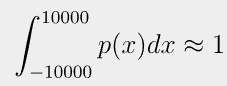 <br/> where, p(x) is probability density function of the normal distribution, $\mathcal{N}(2,2^2)$

In [11]:
def pdf(x):
    # Write code here

    mean = 2
    std_dev = 2

    func = 1 / (np.sqrt(2 * np.pi) * std_dev) * np.exp(-((x - mean)**2) / (2 * std_dev**2))

    return func

np.round(riemann_sum(pdf, 100000, [-10000, 10000]))

1.0

## Problem 2-3
Using **"riemann_sum"** function, find the **expecation and variance** of a random variable which has the following probability density function $f(x)$.<br/>

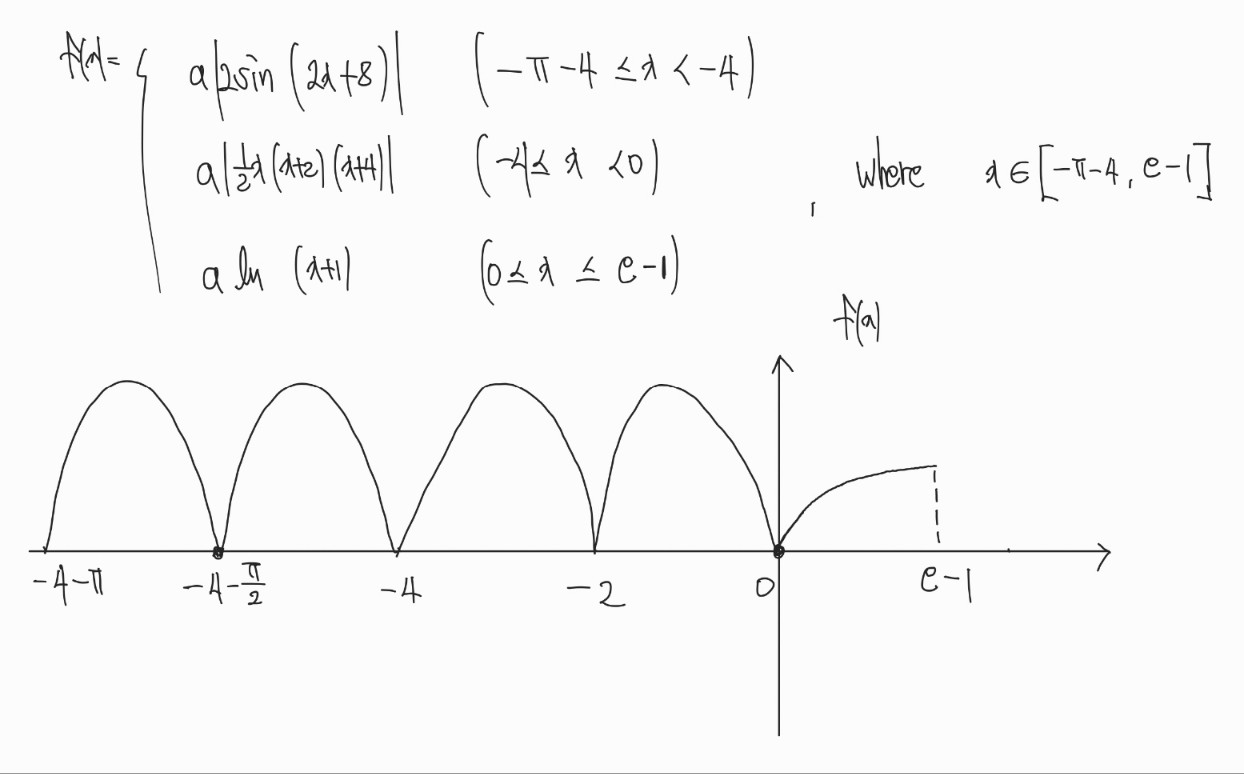

In [13]:
domain1 = [-math.pi -4, -4]
domain2 = [-4, 0]
domain3 = [0, math.e - 1]



# Write code here

def func1(x):
  return np.abs(2 * np.sin(2 * x + 8))

def func2(x):
  return np.abs(1/2 * x*(x+2)*(x+4))

def func3(x):
  return math.log(x + 1)

a =  1/(np.round(riemann_sum(func1, 100000, [-math.pi -4,-4]),3)+np.round(riemann_sum(func2, 100000, [-4,0]),3)+np.round(riemann_sum(func3, 100000, [0,math.e - 1]),3))



# Write code here (using the riemann_sum function that you made)
# Set the num_sub of riemann_sum function as 100000

def func1_ex(x):
  return x*np.abs(2 * np.sin(2 * x + 8))

def func2_ex(x):
  return x*np.abs(1/2 * x*(x+2)*(x+4))

def func3_ex(x):
  return x*math.log(x + 1)

expectation = a * (np.round(riemann_sum(func1_ex, 100000, [-math.pi -4,-4]),3)+np.round(riemann_sum(func2_ex, 100000, [-4,0]),3)+np.round(riemann_sum(func3_ex, 100000, [0,math.e - 1]),3))

def func1_var(x):
  return (x-expectation)**2 * np.abs(2 * np.sin(2 * x + 8))

def func2_var(x):
  return (x-expectation)**2 * np.abs(1/2 * x*(x+2)*(x+4))

def func3_var(x):
  return (x-expectation)**2 * math.log(x + 1)

variance = a * (np.round(riemann_sum(func1_var, 100000, [-math.pi -4,-4]),3)+np.round(riemann_sum(func2_var, 100000, [-4,0]),3)+np.round(riemann_sum(func3_var, 100000, [0,math.e - 1]),3))

print("Expectation E[X]:", np.round(expectation, 3))
print("Variance Var[X]:", np.round(variance, 3))

Expectation E[X]: -3.243
Variance Var[X]: 6.126


# Problem 3. Visualization of Statistical Properties.

In this problem, we will conduct numerical experiments to verify some statistical properties.

In [14]:
import numpy as np

## Problem 3-1

Check the following property of normal distribution:

If there are two random variables which follow normal distribution $X_1 \sim N(\mu_1, \sigma_1^2), X_2 \sim N(\mu_2, \sigma_2^2)$, and if $X_1$ and $X_2$ are independent, we have

$$
aX_1+bX_2\sim N(a\mu_1 + b\mu_2, a^2\sigma_1^2+b^2\sigma_2^2),
$$

where $a,b\in\mathbb{R}$ are fixed, scalar values.



In [15]:
############# Do not modify this cell !!!!!!!!! #####
N = 100000

mu1 = 3
sigma1 = 2

mu2 = 5
sigma2 = 3

np.random.seed(0)
x1 = np.random.normal(mu1,sigma1,N)

x2 = np.random.normal(mu2,sigma2,N)


For the rest of the problem, use the following code to plot probability density of a random variable.

Text(0.5, 1.0, '# of samples:1000, sample mean:-0.03, sample var:1.0')

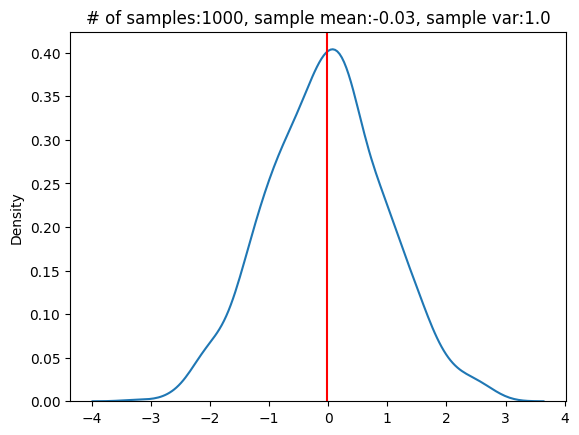

In [16]:
############# Do not modify this cell !!!!!!!!! #####

# EXAMPLE FOR PLOTTING APPROXIMATE DENSITY OF RANDOM VARIABLE!
import matplotlib.pyplot as plt
import seaborn as sns

N_E = 1000
E = np.random.normal(0,1,N_E)

mean = np.mean(E)
var = np.var(E) / (len(E) - 1) * len(E)

sns.kdeplot(E)
plt.axvline(x=mean, color="red")
plt.title(f"# of samples:{N_E}, sample mean:{round(mean,2)}, sample var:{round(var,2)}")

In the following cell, write a code for plotting the density of $\mathcal{N}(3,4)$ using the sample $x_1$.

Text(0.5, 1.0, '# of samples:100000, sample mean:3.0, sample var:3.98')

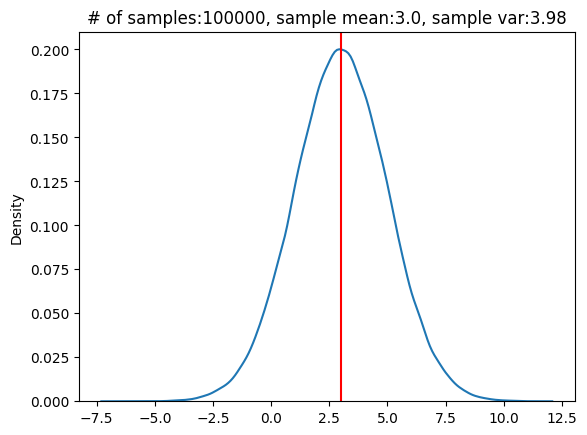

In [17]:
# Write code here

mean = np.mean(x1)
var = np.var(x1) / (len(x1) - 1) * len(x1)

sns.kdeplot(x1)
plt.axvline(x=mean, color="red")
plt.title(f"# of samples:{N}, sample mean:{round(mean,2)}, sample var:{round(var,2)}")


In the following cell, write a code for plotting the density of $\mathcal{N}(5,9)$ using the sample $x_2$.

Text(0.5, 1.0, '# of samples:100000, sample mean:5.02, sample var:8.98')

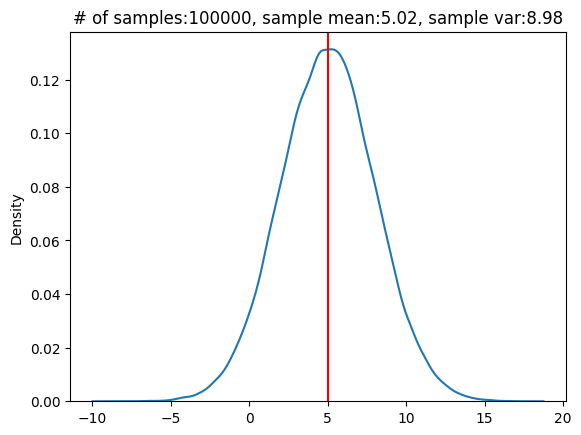

In [20]:
# Write code here

mean = np.mean(x2)
var = np.var(x2) / (len(x2) - 1) * len(x2)

sns.kdeplot(x2)
plt.axvline(x=mean, color="red")
plt.title(f"# of samples:{N}, sample mean:{round(mean,2)}, sample var:{round(var,2)}")


Now, check the property $Y = aX_1+bX_2\sim N(a\mu_1 + b\mu_2, a^2\sigma_1^2+b^2\sigma_2^2)$ by plotting the density of $Y = aX_1+bX_2$, using $x_1$ and $x_2$ that you generated.

In [19]:
############# Do not modify!!!!!!!!! #####
a = 2
b = 4

Text(0.5, 1.0, '# of samples:100000, sample mean:26.07, sample var:159.61')

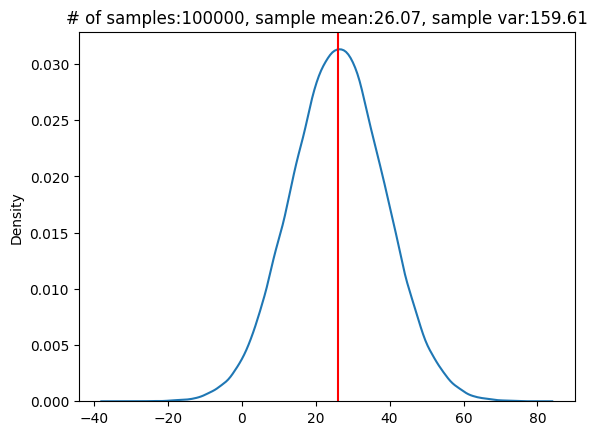

In [21]:
# Write code here

y = a*x1 + b*x2

mean = np.mean(y)
var = np.var(y) / (len(y) - 1) * len(y)

sns.kdeplot(y)
plt.axvline(x=mean, color="red")
plt.title(f"# of samples:{N}, sample mean:{round(mean,2)}, sample var:{round(var,2)}")


## Problem 3-2

Check the Central Limit Theorem(CLT) which states that the sample mean of $n$ i.i.d. random variables approximately follows a normal distribution when $n$ is big. Use the following procedure:


(a) Generate 100 i.i.d. samples $X_1, X_2, \cdots, X_{n}$ from $\mathcal{Ber}(0.25)$ and compute the sample mean.

(b) Repeat (a) for 10000 times to obtain many sample means

(c) Plot the density of the sample means.

(d) Sample 10000 random variables from a normal distribution with mean and variance same as the density in (c). Plot the density of these variables.

(e) Draw the curve of (c) and curve of (d) in the same figure to compare.


In [23]:
## Do not modify !! ##
np.random.seed(0)
######################

# Write code for (a) and (b) here

#(a)
def sample_mean(n):
    samples = np.random.binomial(1, 0.25, n)
    return np.mean(samples)

#(b)
N = 10000
sample_means = [sample_mean(100) for _ in range(N)]

Text(0.5, 1.0, 'Distribution of sample means')

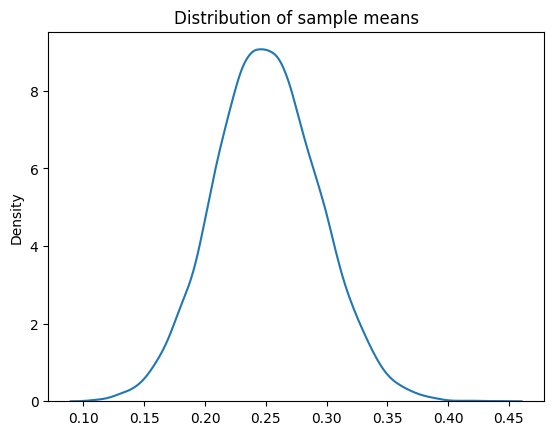

In [30]:
# Write code for (c) here
mean = np.mean(sample_means)
var = np.var(sample_means) / (len(sample_means) - 1) * len(sample_means)

sns.kdeplot(sample_means)
plt.title("Distribution of sample means")


Text(0.5, 1.0, 'Distribution of normal variables ')

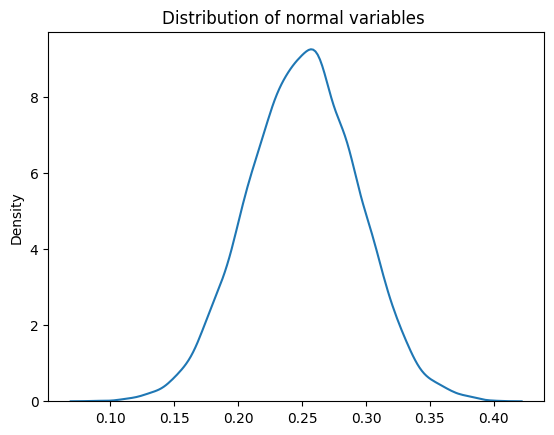

In [37]:
#Write code for (d) here

E = np.random.normal(mean,math.sqrt(var),N)

sns.kdeplot(E)
plt.title(f"Distribution of normal variables ")



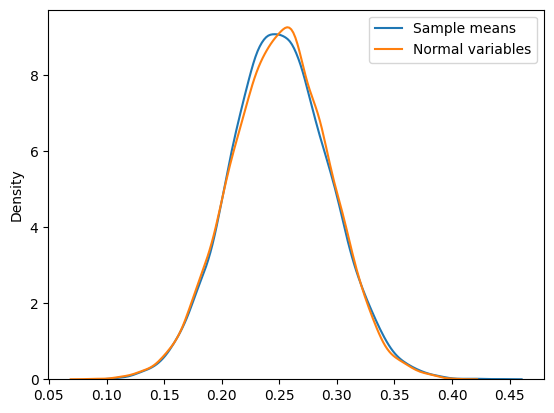

In [39]:
# Draw the curves of (c) and (d) in the same figure
# Write code here

sns.kdeplot(sample_means, label='Sample means')
sns.kdeplot(E, label='Normal variables')
plt.legend()
plt.show()

# Problem 4. Functions for Statitical Testing

In [14]:
import numpy as np
import math
import scipy.stats as stats

## Problem 4-1

Implement the **"calculate_statistic"** function that returns the Z-statistic for the statistical test below.

$$H_0 : \mu = val \quad vs \quad H_1 : \mu \neq val$$


- Inputs of the function are:
1. arr : array of sample. (Assume that the samples are a random sample from a population with mean $\mu$)

2.  normal : boolean. (True or False, default value is False)
It indicates whether the samples follow a normal distribution or not.

3. val : value for null hypothesis. (default value is None)

4. var : variance of population (default value is None)

- Output of the function should be :
1. Z-statistic, string "Z" (tuple)


The function needs to satisfy the conditons below:<br/>
1) If val = None, the function prints an error message, "The Z-statistic cannot be computed due to empty value."<br/>

2) If normal = False and sample size is smaller than 30, <br/>the function still computes the Z statistic but also prints a warning message, "Warning: The CLT may not hold due to small sample size, so the Z statistic may not follow standard normal distribution"

3) If  **var** is 'None', the function should use the sample variance to replace the population variance. If sample size is smaller than 30, the function prints a warning message, "Warning: the sample variance may not be close to the population variance, so the Z statistic may not follow standard normal distribution."


In [10]:
def calculate_statistic(arr, var = None, val = None, normal = False):
    # Write code here
    # 1)
    if val is None:
        print("The Z-statistic cannot be computed due to empty value.")
        return None

    n = len(arr)

    # 2)
    if n < 30 and not normal:
        print("Warning: The CLT may not hold due to small sample size, so the Z statistic may not follow standard normal distribution")

    # 3)
    if var is None and n < 30:
        print("Warning: the sample variance may not be close to the population variance, so the Z statistic may not follow standard normal distribution")


    sample_mean = np.mean(arr)

    if var is None:
        sample_var = np.var(arr, ddof=1)
    else:
        sample_var = var

    z_statistic = (sample_mean - val) / (np.sqrt(sample_var / n))
    return z_statistic, "Z"




### Implementation examples of **calculate_statistic()** function

In [11]:
###### Do not modify this cell!! ############

np.random.seed(42)
sample1 = np.array([np.random.rand() for i in range(5)])
sample2 = np.array([np.random.rand() for i in range(31)])

calculate_statistic(sample1)

The Z-statistic cannot be computed due to empty value.


In [12]:
###### Do not modify this cell!! ############

calculate_statistic(sample1, val = 0.5, normal = False)

(0.451815745829199, 'Z')

In [13]:
###### Do not modify this cell!! ############

calculate_statistic(sample2, var = 1/12, val = 0.5, normal = True)

(-0.9879900555024979, 'Z')

## Problem 4-2

Implement **get_pvalue** function that returns p-value of tests given the $Z$ statistics. (Assume that these statistics are output values from **calculate_statistic** function.)


- Inputs of the function are:
1. statistic : Test statistic
2. alternative : string(default value is "neq") <br/>
The input **alternative** accepts one of the three strings: "neq", ">", "<". The test varies accordingly:

     If alternative = "neq", <br/>$H_0 : \mu = val \quad vs \quad H_1 : \mu \neq val$<br/>
     If alternative = ">",<br/> $H_0 : \mu \leq val \quad vs \ H_1 : \mu > val$<br/>
     If alternative = "<",<br/> $H_0 : \mu \geq val \quad vs \quad H_1 : \mu < val$


- Output of the function should be :
1. P-value of the test.

In [15]:
def get_pvalue(statistic, alternative = 'neq'):
    # Write code here
    if alternative == "neq":
        p_value = 2 * (1 - stats.norm.cdf(abs(statistic)))
    elif alternative == ">":
        p_value = 1 - stats.norm.cdf(statistic)
    elif alternative == "<":
        p_value = stats.norm.cdf(statistic)
    else:
      print("ERROR")

    return p_value


### Implementation examples of **get_pvalue()** function

In [16]:
###### Do not modify this cell!! ############

x = np.array([7.65, 7.60, 7.65, 7.70, 7.55, 7.55, 7.40, 7.40, 7.50, 7.50])

result1 = calculate_statistic(x, var=0.0095, val = 7.8, normal = True)

print(get_pvalue(statistic = result1[0], alternative = '<'), '\n')

2.508775079898314e-16 



In [18]:
###### Do not modify this cell!! ############

result2 = calculate_statistic(x, val = 7.8, normal = True)

print(get_pvalue(statistic = result2[0], alternative = '<'))

7.083697760973489e-15


## Problem 4-3


Implement **get_power** function to return statistical power of given test.

- Inputs of the function are:
1. var: Variance of population
2. val: The hypothesized true population mean under the null hypothesis.
3. alternative: string. The input **alternative** accepts one of the three strings: "neq", ">", "<". The test varies accordingly:

  If alternative = "neq", <br/>$H_0 : \mu = val \quad vs \quad H_1 : \mu \neq val$<br/>
  If alternative = ">",<br/> $H_0 : \mu \leq val \quad vs \ H_1 : \mu > val$<br/>
  If alternative = "<",<br/> $H_0 : \mu \geq val \quad vs \quad H_1 : \mu < val$

4. alter_val: The value that we assume as the population mean if alternative hypothesis is true.
5. alpha: Significance level of test
6. n: The number of samples for the random variable.

- Output of the function is:

1. The power of the test when $\mu=$alter_val.

In [19]:
def get_power(var, val, alternative, alter_val, alpha, n):
    #Write code here
    if alternative == "neq":
        z_alpha = stats.norm.ppf(1 - alpha / 2)
    elif alternative == ">":
        z_alpha = stats.norm.ppf(1 - alpha)
    elif alternative == "<":
        z_alpha = stats.norm.ppf(alpha)
    else:
        print("ERROR")

    stat = (alter_val - val) / (np.sqrt(var / n))

    if alternative == "neq":
        power = 1 - stats.norm.cdf(z_alpha-stat) + stats.norm.cdf(-z_alpha-stat)
    elif alternative == ">":
        power = 1 - stats.norm.cdf(z_alpha-stat)
    elif alternative == "<":
        power = stats.norm.cdf(z_alpha-stat)

    return power





### Implementation examples of **get_power** function

In [20]:
## DO NOT MODIFY!!

N1 = 100
N2 = 1000

var = 2
val = 7
alter_val = 7.1
alpha = 0.05

In [21]:
## DO NOT MODIFY!!
# Power of two-sided test
p_neq_n1 = get_power(var, val, "neq", alter_val, alpha, N1)
p_neq_n2 = get_power(var, val, "neq", alter_val, alpha, N2)

print(p_neq_n1)
print(p_neq_n2)

0.1089546175506152
0.6087794846454536


In [22]:
## DO NOT MODIFY!!
# Power of one(right)-sided test
p_right_n1 = get_power(var, val, ">", alter_val, alpha, N1)
p_right_n2 = get_power(var, val, ">", alter_val, alpha, N2)

print(p_right_n1)
print(p_right_n2)

0.1741872616179314
0.722811595689199


In [23]:
# For alternative when it is "<"
## DO NOT MODIFY!!
N1 = 100
N2 = 1000

var = 2
val = 7
alter_val = 6.9
alpha = 0.25

In [24]:
# Power of one(left)-sided test
## DO NOT MODIFY!!
p_left_n1 = get_power(var, val, "<", alter_val, alpha, N1)
p_left_n2 = get_power(var, val, "<", alter_val, alpha, N2)

print(p_left_n1)
print(p_left_n2)

0.5130100058550059
0.9408063090264489


# Problem 5 (with vs without replacement)

In Problem 5, **You can use only random package and np.mean(), np.var()**

In [25]:
import numpy as np
import random

## DO NOT MODIFY!!!! #

population = [ ((x % 5) + 1) * 10 for x in range(100000)]

# What is population mean and variance?

## Problem 5-1

Take a random sample from the population **with replacement.** Then, **calculate sample mean.**

*   Sample size, n = 1000

In [32]:
####################
random.seed(11)    #
np.random.seed(11) #
####################

# Write code here. You need to use function of random package for with-replacement sampling.
n = 1000
sample = np.random.choice(population, size=n, replace=True)
sample_mean_w = np.mean(sample)


print("Sample mean (with replacement):", sample_mean_w)

Sample mean (with replacement): 30.45


## Problem 5-2

Take a random sample from the population **without replacement.** Then, caculate sample mean.



*   Sample size, n = 1000

In [34]:
####################
random.seed(11)    #
np.random.seed(11) #
####################

# Write code here. You need to use function of random package for without-replacement sampling.
n = 1000
sample = np.random.choice(population, size=n, replace=False)
sample_mean_wo = np.mean(sample)

print("Sample mean (without replacement):", sample_mean_wo)

Sample mean (without replacement): 28.84


## Problem 5-3
Repeat the processes in Problems 5-1 & 5-2 10000 times respectively. Then, calculate the mean and variance of sample means for each case respectively.



*   Sample size, n = 1000
*   Number of iterations = 10000


Lastly, compare variance of sample means(without-replacement sampling) with theoretical values below.

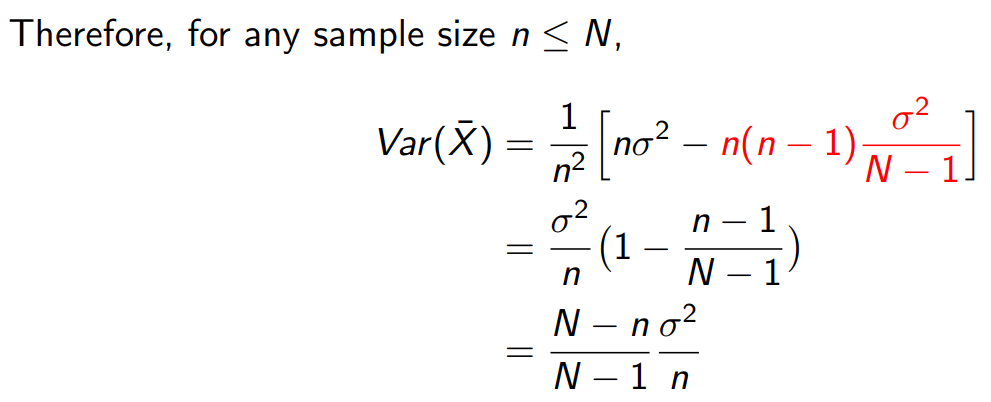


In [37]:
####################
random.seed(11)    #
np.random.seed(11) #
####################

## Write code here

N = 100000
n = 1000
sigma_sqr = 200
iterations = 10000

sample_means_with = []
sample_means_without = []

# With replacment
for _ in range(iterations):
    sample_with = np.random.choice(population, size=n, replace=True)
    sample_mean_with = np.mean(sample_with)
    sample_means_with.append(sample_mean_with)

# Without replacement
for _ in range(iterations):
    sample_without = np.random.choice(population, size=n, replace=False)
    sample_mean_without = np.mean(sample_without)
    sample_means_without.append(sample_mean_without)



mean_with = np.mean(sample_means_with)
variance_with = np.var(sample_means_with)

mean_without = np.mean(sample_means_without)
variance_without = np.var(sample_means_without)



theoretical_value = (N - n)/(N - 1) * sigma_sqr/n


print("Mean of Sample mean (with replacement):", mean_with)
print("Mean of Sample mean (without replacement):", mean_without)

print("Variance of Sample mean (with replacement):", variance_with)
print("Variance of Sample mean (without replacement):", variance_without)

print("Theoretical value of Variance of Sample mean (without replacement): ", theoretical_value)

Mean of Sample mean (with replacement): 30.007148000000004
Mean of Sample mean (without replacement): 30.007156
Variance of Sample mean (with replacement): 0.19789228609600001
Variance of Sample mean (without replacement): 0.19823803166399998
Theoretical value of Variance of Sample mean (without replacement):  0.1980019800198002
